## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Yadul Jayadev

### Problem Statement:

- Predict the percentage of an student based on the no. of study hours.

- What will be predicted score if a student studies for 9.25 hrs/ day?

In [54]:
# importing the libraries

import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import os
import itertools
import warnings
warnings.filterwarnings('ignore')

In [114]:
# Reading data from remote link

url = "http://bit.ly/w-data"
df1 = pd.read_csv(url)
print("Data imported successfully")

df1.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [56]:
# Checking the shape of dataset

df1.shape

(25, 2)

Here we are having 25 rows and 2 features in our dataset.

In [57]:
# Info()

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


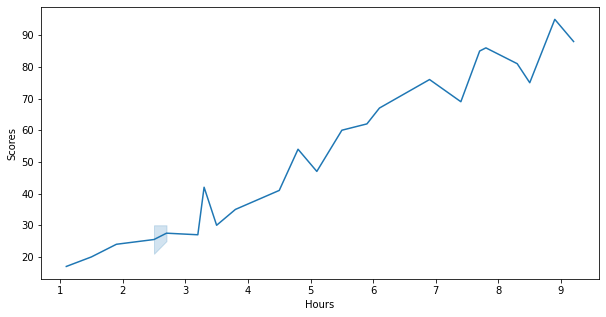

In [58]:
# Visualizing both the features
# Linearity of data

plt.figure(figsize=(10,5))
sns.lineplot(df1['Hours'],df1['Scores'])
plt.show()

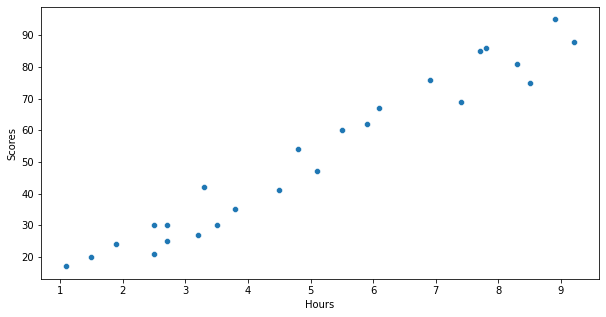

In [86]:
# Distribution of points across the data

plt.figure(figsize=(10,5))
sns.scatterplot(df1['Hours'],df1['Scores'])
plt.show()

#### Inference:

- From the above lineplot and scatterplot it is clear that both the features Hours and Scores are having some relation.

- Here when the study hours increases, the scores also increasing proportionally.

- Hence we are noticing here a linear relationship between the features.

In [59]:
x=df1.iloc[:, :-1].values  
y=df1.iloc[:, 1].values 

### Using stats model:

In [67]:
import statsmodels.api as sm

In [68]:
xc=sm.add_constant(x)

In [69]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xc,y,test_size=0.3,random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17, 2)
(17,)
(8, 2)
(8,)


In [70]:
model = sm.OLS(y_train,x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     308.6
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           2.05e-11
Time:                        19:57:30   Log-Likelihood:                -53.419
No. Observations:                  17   AIC:                             110.8
Df Residuals:                      15   BIC:                             112.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7942      3.209      0.871      0.3

In [72]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [110]:
print('\nThe predicted score for a student, if he studies for 9.25 hours is:',model.predict([1,9.25])[0])


The predicted score for a student, if he studies for 9.25 hours is: 92.61670033840093


In [105]:
from sklearn.metrics import mean_squared_error as mse, r2_score

print('Train R2-Score from statsmodel:',r2_score(y_train,y_pred_train))
print('Test R2-Score from statsmodel:',r2_score(y_test,y_pred_test))
print('\nMean Squared Error from statsmodel:',mse(y_train,y_pred_train))
print('\nRoot Mean Squared Error from statsmodel:',np.sqrt(mse(y_train,y_pred_train)))

Train R2-Score from statsmodel: 0.9536486503889446
Test R2-Score from statsmodel: 0.9487647340257012

Mean Squared Error from statsmodel: 31.398307995353267

Root Mean Squared Error from statsmodel: 5.6034193128261665


### Using Linear Model

In [93]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train,y_train)

lr.predict(x_train)

array([39.69425223, 17.36000808, 33.86792767, 46.49163089, 89.21801101,
       85.33379464, 36.78108995, 29.0126572 , 21.24422446, 49.40479317,
       62.02849639, 78.53641598, 56.20217183, 77.56536189, 13.47579171,
       74.65219961, 92.13117329])

In [112]:
print('\nThe predicted score for a student, if he studies for 9.25 hours is:',lr.predict([[1,9.25]])[0])


The predicted score for a student, if he studies for 9.25 hours is: 92.61670033840093


In [106]:
print('Train R2-Score from statsmodel:',r2_score(y_train,lr.predict(x_train)))
print('Test R2-Score from statsmodel:',r2_score(y_test,lr.predict(x_test)))
print('\nMean Squared Error from linear model:',mse(y_train,lr.predict(x_train)))
print('\nRoot Mean Squared Error from linear model:',np.sqrt(mse(y_train,lr.predict(x_train))))

Train R2-Score from statsmodel: 0.9536486503889446
Test R2-Score from statsmodel: 0.9487647340257012

Mean Squared Error from linear model: 31.398307995353267

Root Mean Squared Error from linear model: 5.6034193128261665


### Final Inference:

- Here we tried out both the stats model and linear model to find the best prediction.

- We are getting similar results for both the models.

- The RMSE score here we getting is 5.60 which will be in hours.

##                                                            Thank You